In [1]:
from pandas import read_csv, isna, get_dummies
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import missingno as msno

In [2]:
df = read_csv("adult.data", ", ", na_values="?")

<ipython-input-2-3acfbd6a36ff>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = read_csv("adult.data", ", ", na_values="?")
<ipython-input-2-3acfbd6a36ff>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = read_csv("adult.data", ", ", na_values="?")


In [3]:
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

In [4]:
df.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       50  Self-emp-not-inc   83311   Bachelors             13   
1       38           Private  215646     HS-grad              9   
2       53           Private  234721        11th              7   
3       28           Private  338409   Bachelors             13   
4       37           Private  284582     Masters             14   
...    ...               ...     ...         ...            ...   
32555   27           Private  257302  Assoc-acdm             12   
32556   40           Private  154374     HS-grad              9   
32557   58           Private  151910     HS-grad              9   
32558   22           Private  201490     HS-grad              9   
32559   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0      Married-civ-spouse    Exec-managerial        Husband  White    Male   
1    

<Axes: >

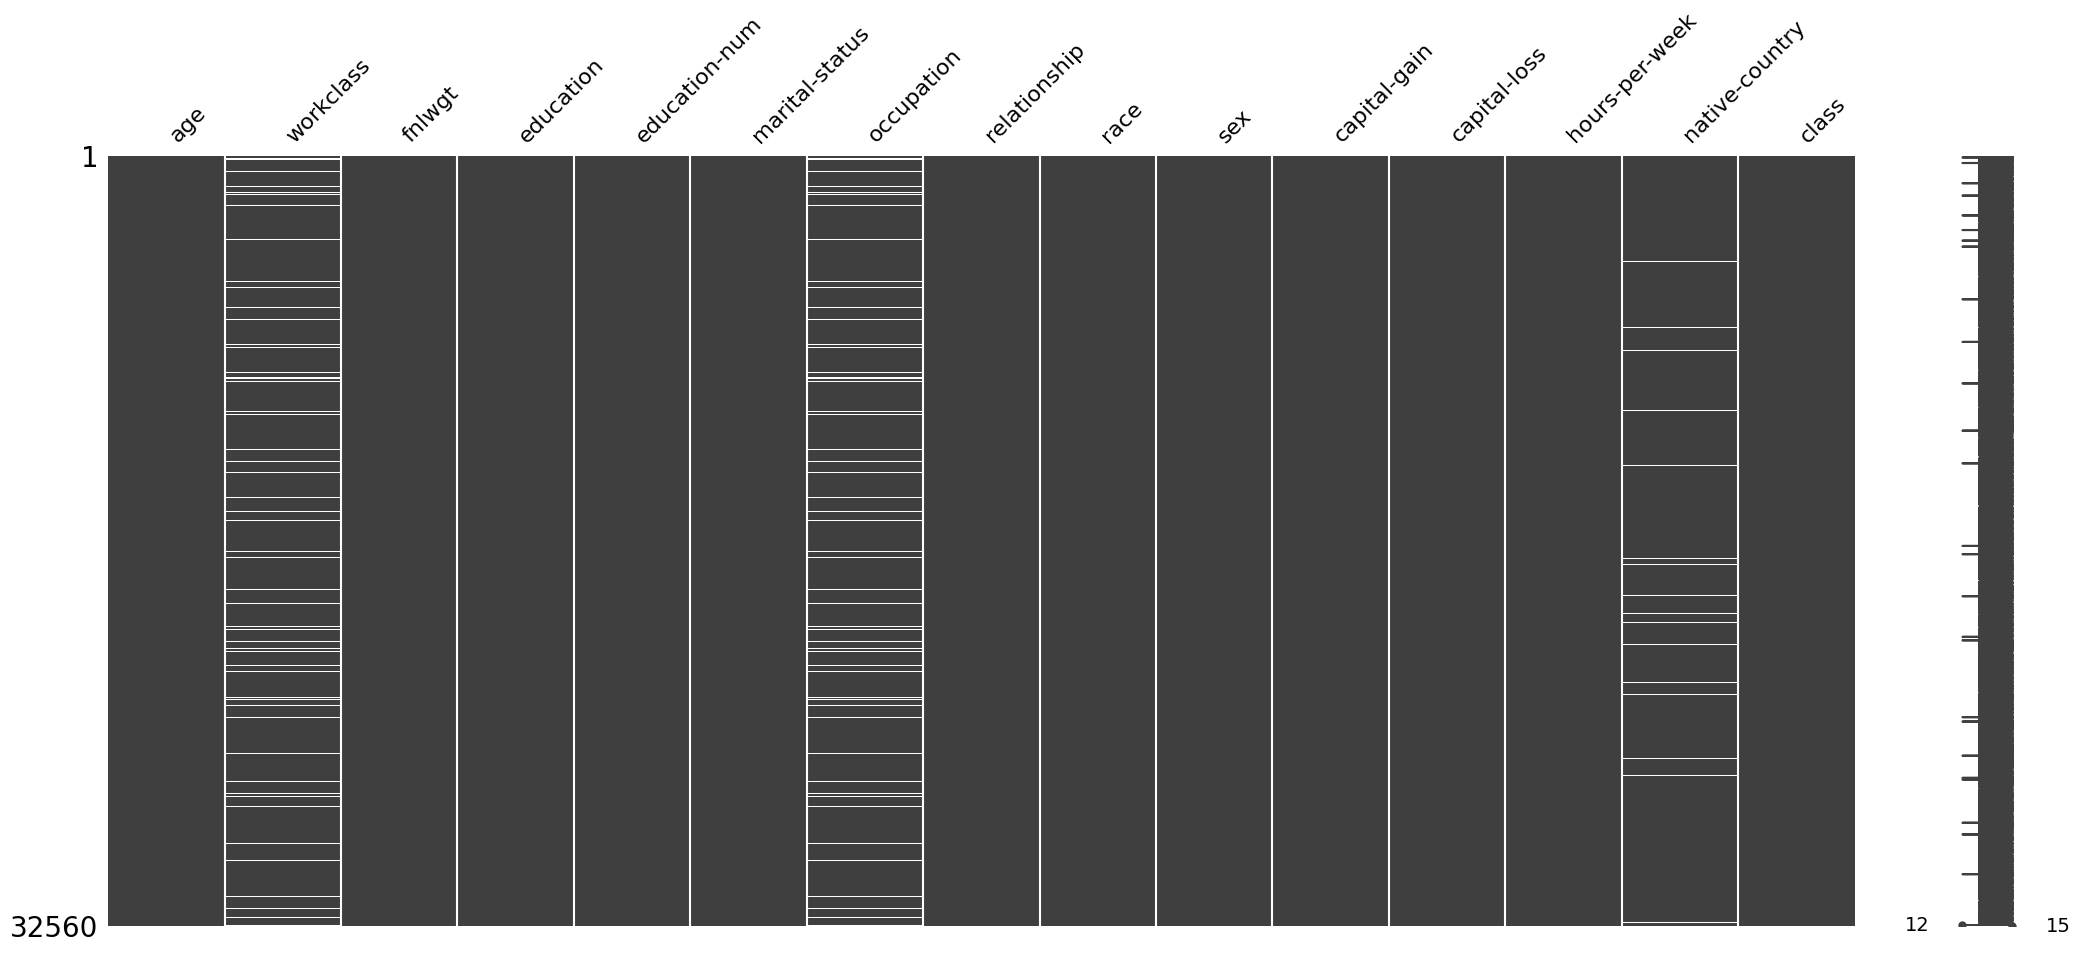

In [5]:
msno.matrix(df)

In [6]:
df.isna().sum() / len(df['age']) * 100

age               0.000000
workclass         5.638821
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660319
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790541
class             0.000000
dtype: float64

In [7]:
df = df.dropna()
df.isna().sum() / len(df['age']) * 100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

In [25]:
categorical = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

In [26]:
transformed = get_dummies(df, columns=categorical)

In [27]:
X = transformed.loc[:, transformed.columns != "class"]
y = transformed["class"]

In [29]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier()]
classifiers_names = ["Decision Tree", "Random Forest", "Extra Trees"]

In [30]:
print("default params")
for (i, classifier) in enumerate(classifiers):
  print(classifiers_names[i], cross_val_score(classifier, X, y, cv=5).mean())

default params
Decision Tree 0.8100528272661283
Random Forest 0.8499055207411403
Extra Trees 0.8283876895465742
